# Table of Contents

1. [Introduction](#Introduction)
2. [Required Modules](#Required-Modules)
3. [Data Preprocessing](#Data-Preprocessing)
  - [Key Features](#Key-Features)
  - [Descriptive Statistics](#Descriptive-Statistics)
  - [Missing Values](#Missing-Values)
  - [Data Transformation](#Data-Transformation)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Visualization](#Visualization)
  - [Correlation](#Correlation)
5. [Model Building](#Model-Building)
  - [Logistic Regression](#Logistic-Regression)
  - [Decision Tree](#Decision-Tree)
  - [Linear SVM](#Linear-SVM)
  - [Naive Bayes Classifier](#Naive-Bayes-Classifier)
  - [K-Nearest Neighbour](#K--Nearest-Neighbour)
  - [Random Forest](#Random-Forest)
  - [Gradient Boosting Classifier](#Gradient-Boosting-Classifier)
6. [Evaluation](#Evaluation)
7. [Conclusion](#Conclusion)

## 1. Introduction <a name="Introduction"></a>

Early stage diabetes prediction analysis aims to develop a predictive model to identify individuals who are at risk of developing diabetes in the early stages. By analyzing various factors. This analysis seeks to detect potential markers and patterns that can help in early intervention and prevention of diabetes.


In the following sections, we will delve into the dataset, perform preprocessing tasks, conduct exploratory data analysis, build and evaluate predictive models, and conclude with a summary of our findings and potential future directions.









## 2. Required Modules <a name="Required-Modules"></a>



In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

## 3. Data Preprocessing <a name="Data-Preprocessing"></a>
In this section, we discuss the steps taken to preprocess the dataset. Through preprocessing steps, including data cleaning, handling missing values, and converting categorical variables into numerical formats, we will ensure the dataset is ready for analysis.


### 3.1 Key Features <a name="Key-Features"></a>
The dataset contains the following information:




In [106]:
# Load the data
data = pd.read_csv('diabetes_data_upload.csv')
data.head(-1)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,54,Female,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,No,Positive
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive


### 3.2 Descriptive Statistics <a name="Descriptive-Statistics"></a>

Now we generate the summary statistics:

- Count: The number of non-missing values in each column.
- Mean: The average value of each column.
- Standard Deviation: A measure of the amount of variation or dispersion in each column.
- Minimum: The minimum value in each column.
- 25th Percentile (Q1): The value below which 25% of the data falls.
- Median (50th Percentile or Q2): The middle value in each column. It represents the value below which 50% of the data falls.
- 75th Percentile (Q3): The value below which 75% of the data falls.
- Maximum: The maximum value in each column.


In [107]:
data.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

### 3.3 Missing Values <a name="Missing-Values"></a>



In [109]:
# Check for missing values in the dataset
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
#checking the data types of the columns
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### 3.4 Data Transformation <a name="Data-Transformation"></a>



In [111]:
data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [113]:
data.columns = map(str.lower, data.columns)
data.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden weight loss',
       'weakness', 'polyphagia', 'genital thrush', 'visual blurring',
       'itching', 'irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

## 4. Exploratory Data Analysis <a name="Exploratory-Data-Analysis"></a>

Exploratory data analysis will allow us to gain insights into the distribution of features, detect correlations, and uncover potential patterns and trends.

### 4.1 Visualization <a name="Visualization"></a>

<ipython-input-114-4b83b7e1d738>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'],bins=30, color='royalblue')


Text(0.5, 1.0, 'Diabetes distribution by age')

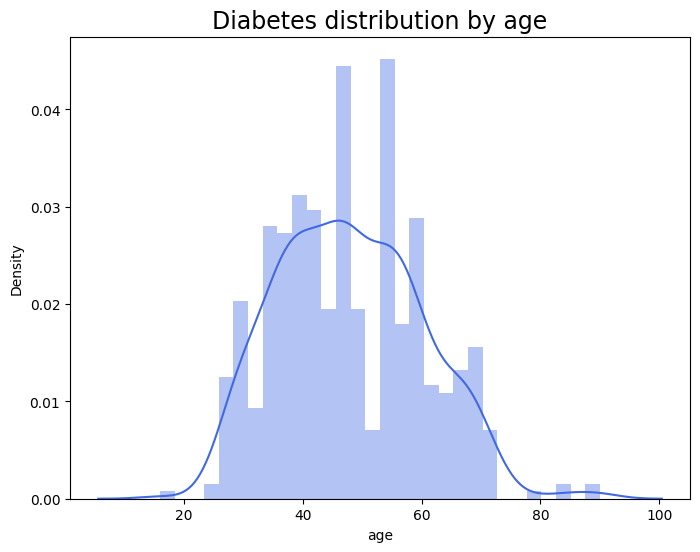

In [114]:
plt.figure(figsize=(8,6))
sns.distplot(data['age'],bins=30, color='royalblue')
plt.title('Diabetes distribution by age', fontsize=17)

<ipython-input-121-37554e9b64cc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data['class'], palette='dark')


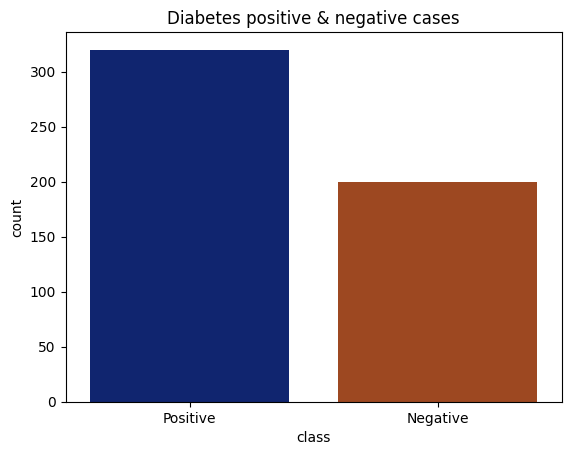

<Figure size 1500x800 with 0 Axes>

In [121]:
sns.countplot(x = data['class'], palette='dark')
plt.title('Diabetes positive & negative cases');
plt.figure(figsize=(15,8))
plt.show()

<Axes: title={'center': 'Diabetes cases by Gender'}, xlabel='gender', ylabel='count'>

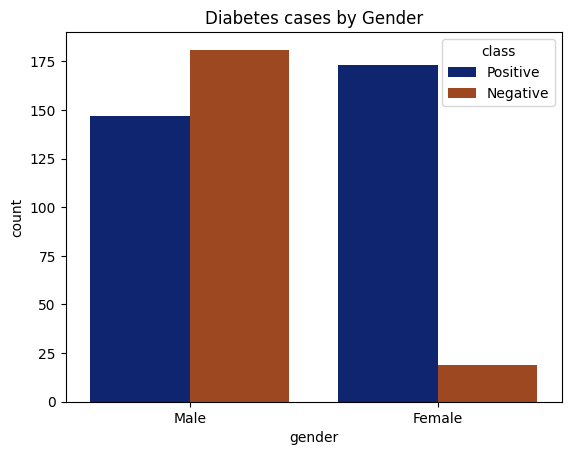

In [124]:
plt.title('Diabetes cases by Gender');
sns.countplot(x=data['gender'],hue=data['class'], palette='dark')

<ipython-input-127-a25084f428f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="class", y="age", data=data, palette='dark')


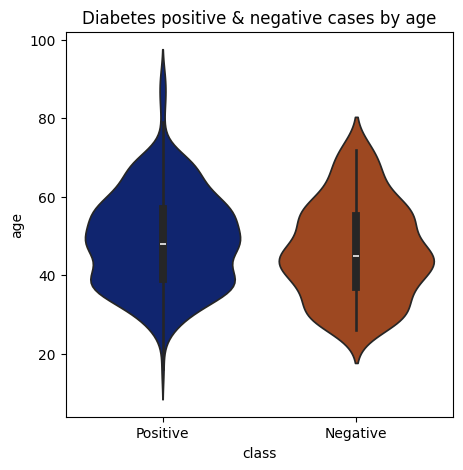

In [127]:
plt.figure(figsize=(5,5))
plt.title('Diabetes positive & negative cases by age');
ax = sns.violinplot(x="class", y="age", data=data, palette='dark')

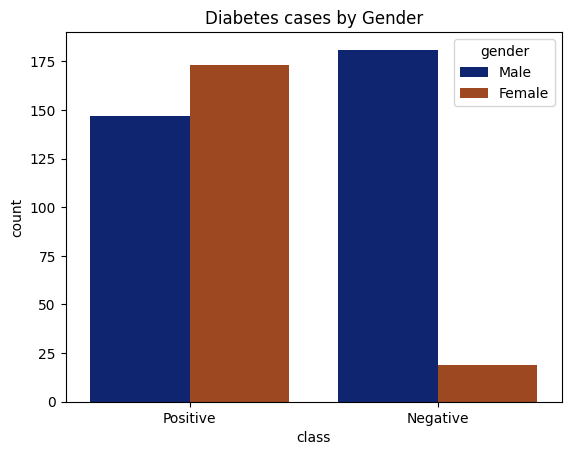

In [130]:
plt.title('Diabetes cases by Gender');
ax = sns.countplot(x=data["class"], data=data, hue="gender", palette='dark')

In [131]:
#Replacing the categorical variables with numerical values
data['gender'] = data['gender'].map({'Male':1,'Female':0})
data['class'] = data['class'].map({'Positive':1,'Negative':0})
data['polyuria'] = data['polyuria'].map({'Yes':1,'No':0})
data['polydipsia'] = data['polydipsia'].map({'Yes':1,'No':0})
data['sudden weight loss'] = data['sudden weight loss'].map({'Yes':1,'No':0})
data['weakness'] = data['weakness'].map({'Yes':1,'No':0})
data['polyphagia'] = data['polyphagia'].map({'Yes':1,'No':0})
data['genital thrush'] = data['genital thrush'].map({'Yes':1,'No':0})
data['visual blurring'] = data['visual blurring'].map({'Yes':1,'No':0})
data['itching'] = data['itching'].map({'Yes':1,'No':0})
data['irritability'] = data['irritability'].map({'Yes':1,'No':0})
data['delayed healing'] = data['delayed healing'].map({'Yes':1,'No':0})
data['partial paresis'] = data['partial paresis'].map({'Yes':1,'No':0})
data['muscle stiffness'] = data['muscle stiffness'].map({'Yes':1,'No':0})
data['alopecia'] = data['alopecia'].map({'Yes':1,'No':0})
data['obesity'] = data['obesity'].map({'Yes':1,'No':0})

### 4.2 Correlation <a name="Correlation"></a>

In [134]:
data.corr()

,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


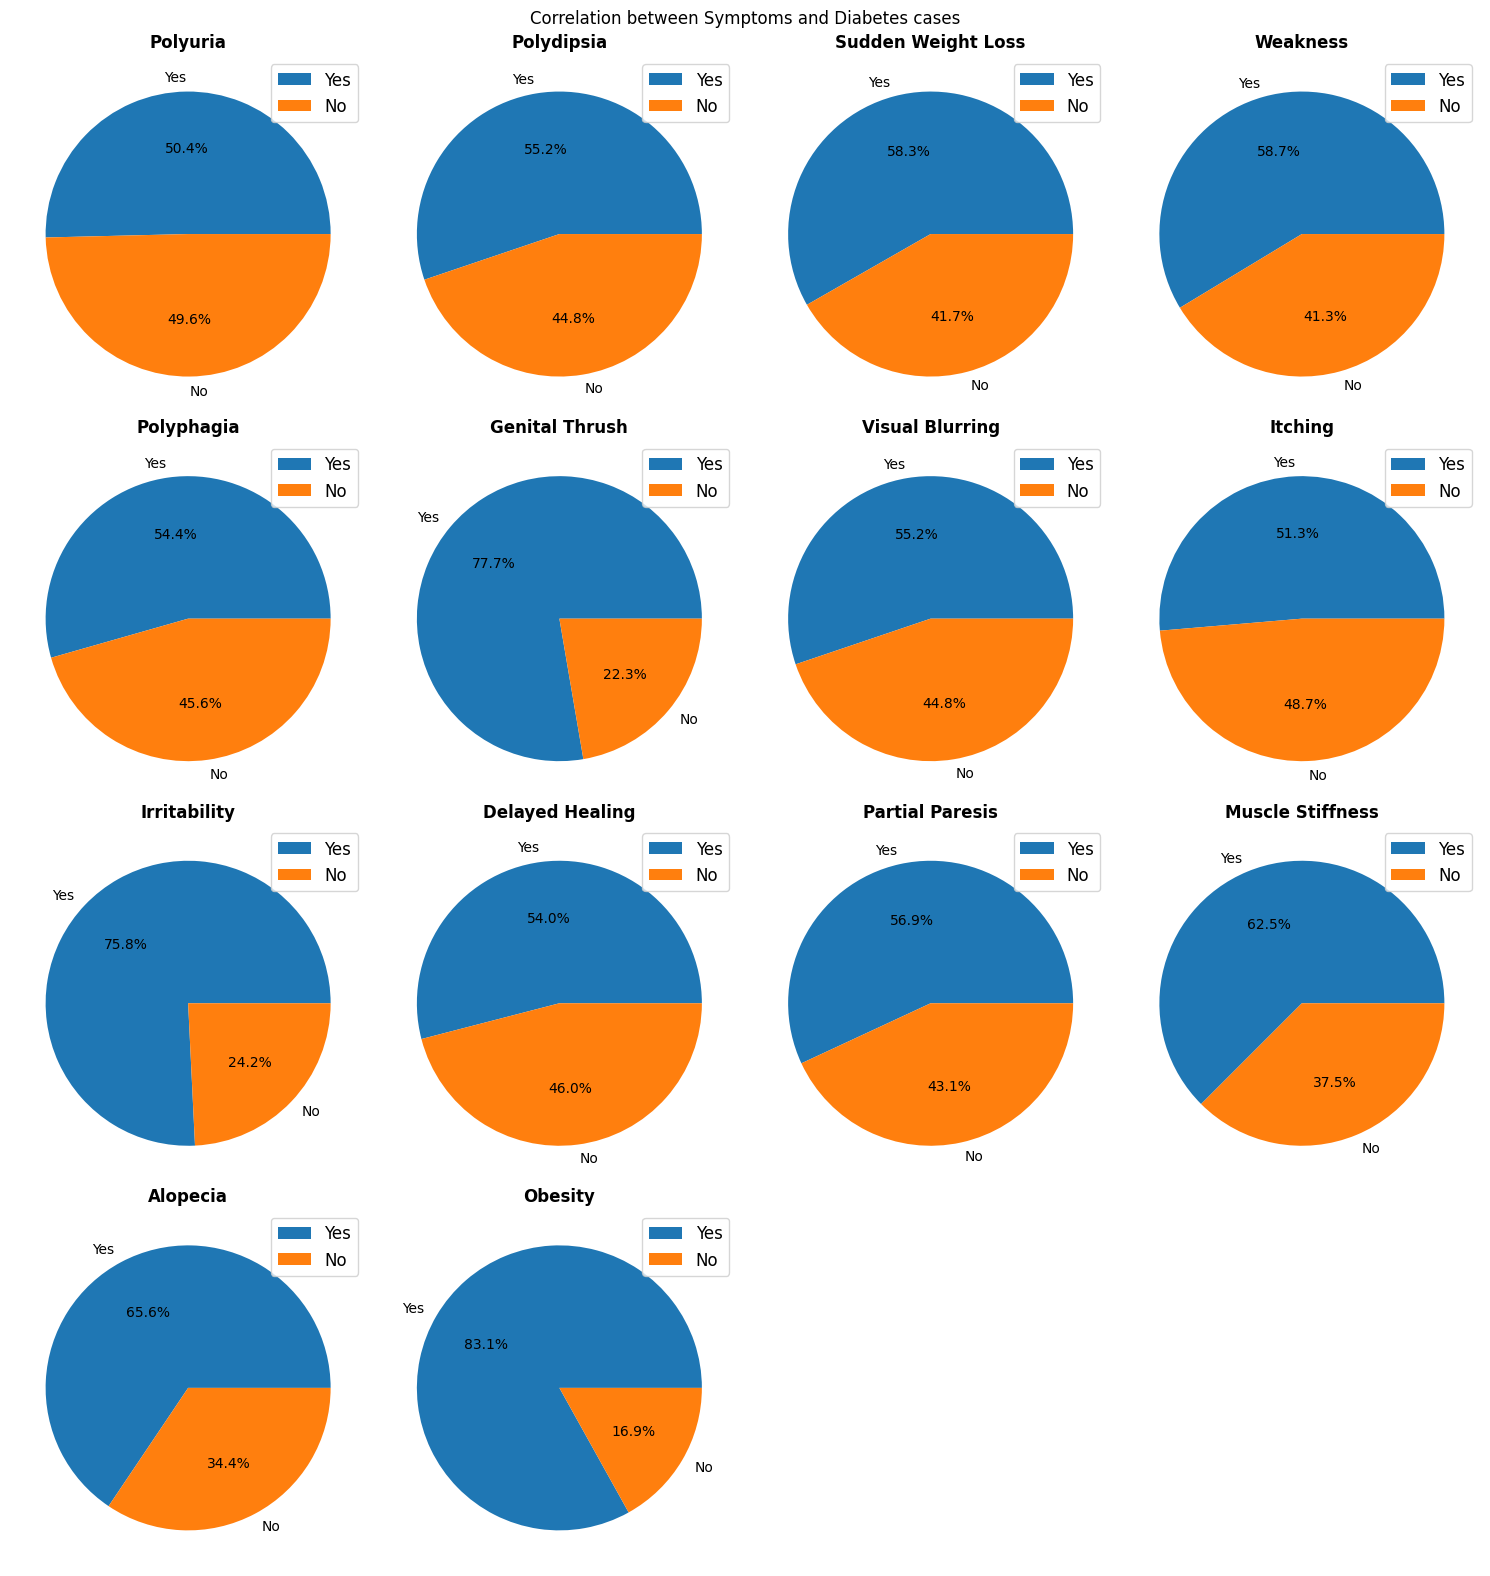

In [136]:
count = 1
plt.figure(figsize=(15,20))
plt.suptitle('Correlation between Symptoms and Diabetes cases'+ '\n')
for i in data.columns:
    if i not in ['class', 'age', 'gender']:
        plt.subplot(5,4,count)
        plt.title(f'{i.title()}', fontweight='bold', fontsize=14)
        count +=1
        plt.tight_layout()
        data[i].value_counts().plot(kind="pie",autopct='%1.1f%%',legend=True,labels=["Yes","No"])
        plt.ylabel('')
        plt.title(f'{i.title()}',fontweight='bold',fontsize=12)
        plt.legend(loc = "upper right",fontsize=12)
plt.tight_layout()
plt.show()


<Axes: >

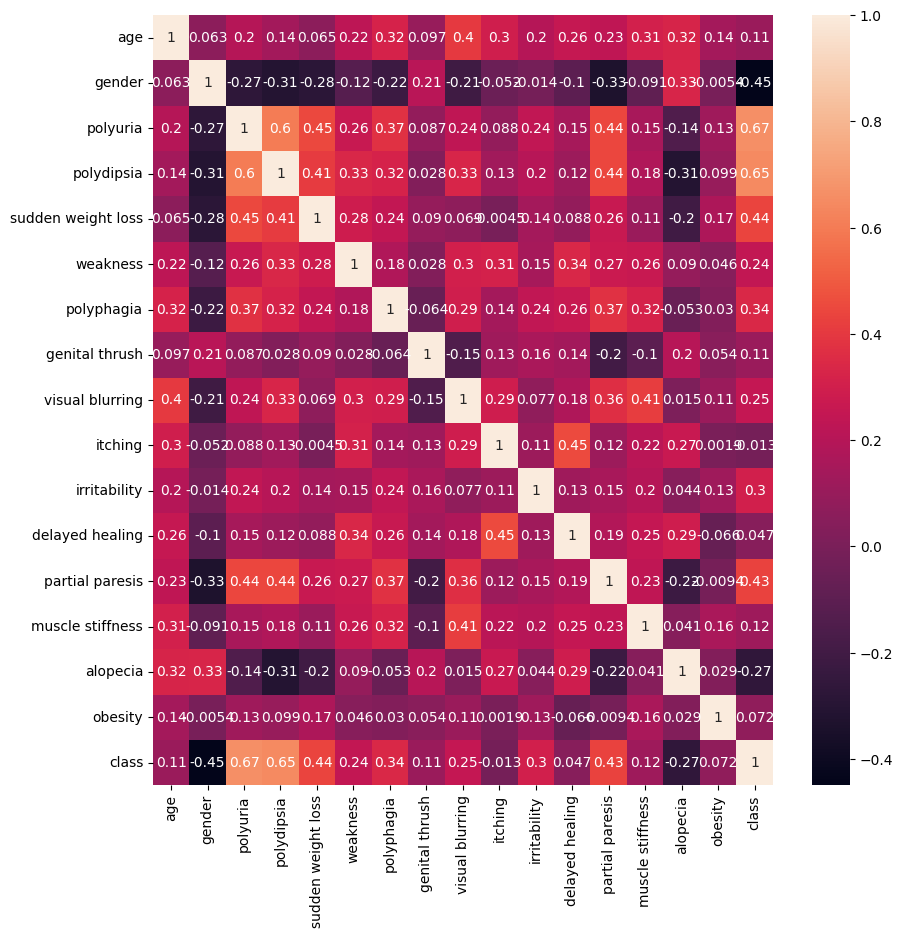

In [137]:
# create a heatmap to check the correlation
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

## 5. Model Building <a name="Model-Building"></a>
In thise section we build predictive models using machine learning algorithms.
First we have to split the dataset for training and testing.


In [138]:
x = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(X_train.shape,y_train.shape)

(364, 16) (364,)


In [139]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [141]:
X = ss.fit_transform(x)

### 5.1 Logistic Regression <a name="Logistic-Regression"></a>

In [142]:
lr = LogisticRegression()

#model training
lr.fit(X_train,y_train)

#model accuracy
lr.score(X_test,y_test)

0.9294871794871795

In [143]:
#model prediction
lr_pred = lr.predict(X_test)

### 5.2 Decision Tree <a name="Decision-Tree"></a>

In [144]:
dtr_model = DecisionTreeClassifier(random_state=0)
dtr_model.fit(X_train,y_train)
dtr_pred = dtr_model.predict(X_test)

### 5.3 Linear SVM <a name="Linear-SVM"></a>

In [145]:
svm_model=SVC(kernel='linear',random_state=0)
svm_model.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)

### 5.4 Naive Bayes classifier <a name="Naive-Bayes-classifier"></a>


In [146]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)


### 5.5 K-Nearest Neighbour <a name="K--Nearest-Neighbour"></a>


In [147]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)


### 5.6 Random Forest <a name="Random-Forest"></a>


In [148]:
rf_model = RandomForestClassifier(n_estimators=15, random_state = 0)
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

### 5.7 Gradient Boosting Classifier <a name="Gradient-Boosting-Classifier"></a>


In [149]:
gb_model = GradientBoostingClassifier(n_estimators=15, random_state = 0)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

## 6. Evaluation <a name="Evaluation"></a>
In this secton we evaluate the performance of the models and compare them.

In [151]:
lr_error = mean_squared_error(y_test, lr_pred)
print("The Mean Squared Error For Linear Regression is: {}".format(lr_error))

The Mean Squared Error For Linear Regression is: 0.07051282051282051


In [154]:
linscore = lr.score(X_test,y_test)
lin_cm = confusion_matrix(y_test,lr_pred)
lin_cr = classification_report(y_test,lr_pred)
print('Logistic Regression results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(linscore *100))
print('\n')
print('Confusion Matrix')
print(lin_cm)
print('\n')
print('Classification report')
print(lin_cr)

Logistic Regression results
---------------------------
Accuracy is 92.95%


Confusion Matrix
[[56  6]
 [ 5 89]]


Classification report
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        62
           1       0.94      0.95      0.94        94

    accuracy                           0.93       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.93      0.93      0.93       156



In [155]:
dtr_error = mean_squared_error(y_test, dtr_pred)
print("The Mean Squared Error For Decision Tree Regression is: {}".format(dtr_error))

The Mean Squared Error For Decision Tree Regression is: 0.038461538461538464


In [156]:
dtscore = dtr_model.score(X_test,y_test)
dt_cm = confusion_matrix(y_test,dtr_pred)
dt_cr = classification_report(y_test,dtr_pred)
print('Decision Tree results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(dtscore *100))
print('\n')
print('Confusion Matrix')
print(dt_cm)
print('\n')
print('Classification report')
print(dt_cr)

Decision Tree results
---------------------------
Accuracy is 96.15%


Confusion Matrix
[[60  2]
 [ 4 90]]


Classification report
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        62
           1       0.98      0.96      0.97        94

    accuracy                           0.96       156
   macro avg       0.96      0.96      0.96       156
weighted avg       0.96      0.96      0.96       156



In [157]:
svm_error = mean_squared_error(y_test, svm_pred)
print("The Mean Squared Error For Support Vector Machine is: {}".format(svm_error))

The Mean Squared Error For Support Vector Machine is: 0.08333333333333333


In [158]:
svmscore= svm_model.score(X_test, y_test)
svm_cm = confusion_matrix(y_test,svm_pred)
svm_cr = classification_report(y_test,svm_pred)
print('Support Vector Machine results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(svmscore *100))
print('\n')
print('Confusion Matrix')
print(svm_cm)
print('\n')
print('Classification report')
print(svm_cr)

Support Vector Machine results
---------------------------
Accuracy is 91.67%


Confusion Matrix
[[54  8]
 [ 5 89]]


Classification report
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        62
           1       0.92      0.95      0.93        94

    accuracy                           0.92       156
   macro avg       0.92      0.91      0.91       156
weighted avg       0.92      0.92      0.92       156



In [159]:
nb_error = mean_squared_error(y_test, nb_pred)
print("The Mean Squared Error For Naive Bayes classifier is: {}".format(nb_error))

The Mean Squared Error For Naive Bayes classifier is: 0.10897435897435898


In [160]:
nbscore = nb_model.score(X_test,y_test)
nb_cm = confusion_matrix(y_test,nb_pred)
nb_cr = classification_report(y_test,nb_pred)
print('Naive Bayes classifier results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(nbscore *100))
print('\n')
print('Confusion Matrix')
print(nb_cm)
print('\n')
print('Classification report')
print(nb_cr)

Naive Bayes classifier results
---------------------------
Accuracy is 89.10%


Confusion Matrix
[[50 12]
 [ 5 89]]


Classification report
              precision    recall  f1-score   support

           0       0.91      0.81      0.85        62
           1       0.88      0.95      0.91        94

    accuracy                           0.89       156
   macro avg       0.90      0.88      0.88       156
weighted avg       0.89      0.89      0.89       156



In [161]:
knn_error = mean_squared_error(y_test, knn_pred)
print("The Mean Squared Error For K Nearest Neighbour is: {}".format(knn_error))

The Mean Squared Error For K Nearest Neighbour is: 0.01282051282051282


In [162]:
knnscore = nb_model.score(X_test,y_test)
knn_cm = confusion_matrix(y_test,knn_pred)
knn_cr = classification_report(y_test,knn_pred)
print('K Nearest Neighbour results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(knnscore *100))
print('\n')
print('Confusion Matrix')
print(knn_cm)
print('\n')
print('Classification report')
print(knn_cr)

K Nearest Neighbour results
---------------------------
Accuracy is 89.10%


Confusion Matrix
[[61  1]
 [ 1 93]]


Classification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.99      0.99      0.99        94

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



In [163]:
rf_error = mean_squared_error(y_test, rf_pred)
print("The Mean Squared Error For Random Forest is: {}".format(rf_error))

The Mean Squared Error For Random Forest is: 0.01282051282051282


In [164]:
rfscore = rf_model.score(X_test,y_test)
rf_cm = confusion_matrix(y_test,rf_pred)
rf_cr = classification_report(y_test,rf_pred)
print('Random Forest results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(rfscore *100))
print('\n')
print('Confusion Matrix')
print(rf_cm)
print('\n')
print('Classification report')
print(rf_cr)

Random Forest results
---------------------------
Accuracy is 98.72%


Confusion Matrix
[[61  1]
 [ 1 93]]


Classification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.99      0.99      0.99        94

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



In [165]:
gb_error = mean_squared_error(y_test, gb_pred)
print("The Mean Squared Error For Gradient Boosting Classifier is: {}".format(gb_error))

The Mean Squared Error For Gradient Boosting Classifier is: 0.08333333333333333


In [166]:
gbscore = gb_model.score(X_test,y_test)
gb_cm = confusion_matrix(y_test,gb_pred)
gb_cr = classification_report(y_test,gb_pred)
print('Gradient Boosting Classifier results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(gbscore *100))
print('\n')
print('Confusion Matrix')
print(gb_cm)
print('\n')
print('Classification report')
print(gb_cr)

Gradient Boosting Classifier results
---------------------------
Accuracy is 91.67%


Confusion Matrix
[[54  8]
 [ 5 89]]


Classification report
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        62
           1       0.92      0.95      0.93        94

    accuracy                           0.92       156
   macro avg       0.92      0.91      0.91       156
weighted avg       0.92      0.92      0.92       156



In [167]:
models = {
"Logistic Regression": LogisticRegression(),
"Decision Tree": DecisionTreeClassifier(),
"Linear Support Vector Machine": SVC(),
"Naive Bayes Classifier": GaussianNB(),
"K-Nearest Neighbour": KNeighborsClassifier(),
"Random Forest": RandomForestClassifier(),
"Gradient Boosting Classifier": GradientBoostingClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))


Logistic Regression: 92.95%
Decision Tree: 96.15%
Linear Support Vector Machine: 96.15%
Naive Bayes Classifier: 89.10%
K-Nearest Neighbour: 91.67%
Random Forest: 98.08%
Gradient Boosting Classifier: 97.44%


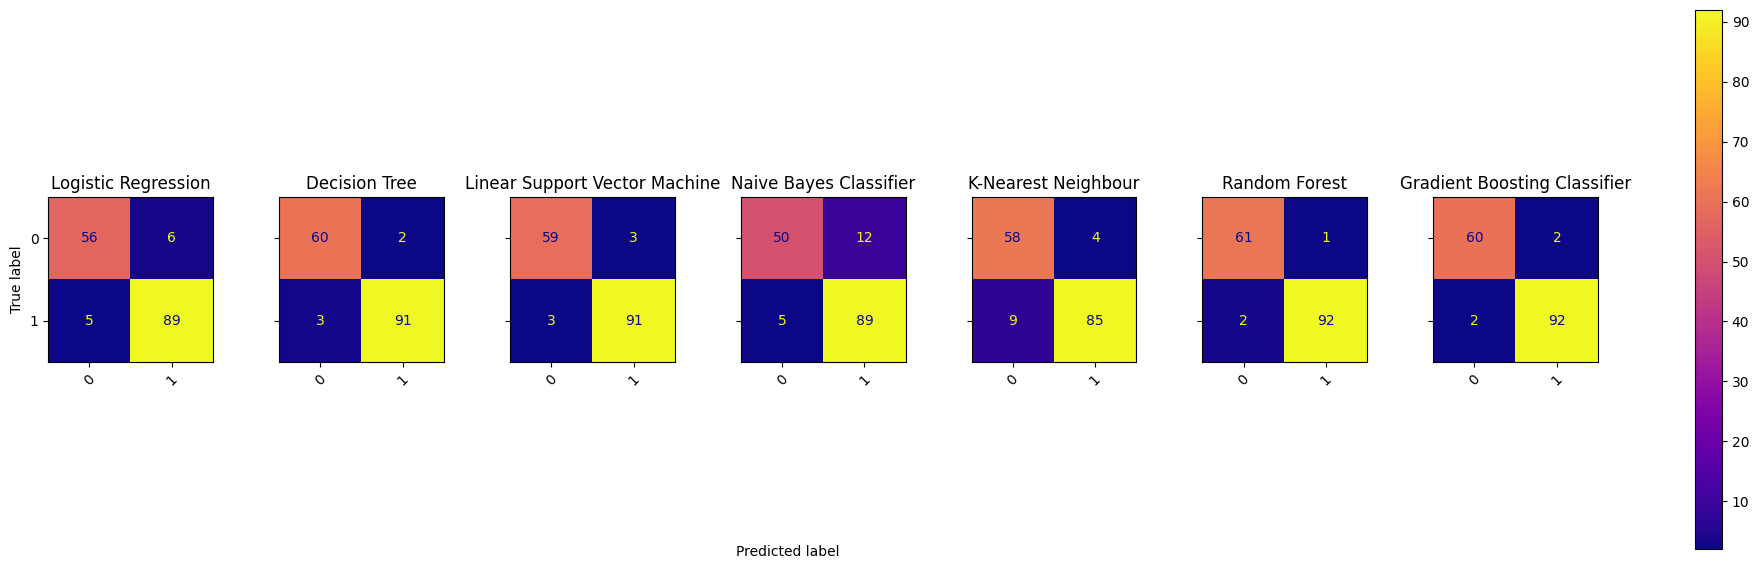

In [169]:
fig, axes = plt.subplots(1, 7, figsize=(25, 7), sharey='row')
for i, (name, model) in enumerate(models.items()):
    y_pred = model.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45, cmap='plasma')
    disp.ax_.set_title(name)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')
fig.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)
fig.colorbar(disp.im_, ax=axes)
plt.show()

## 7. Conclusion <a name="Conclusion"></a>

In summary, Random Forest, Gradient Boosting Classifier, Decision Tree, and Linear SVM demonstrated the highest accuracy rates for early stage diabetes prediction. These models can be utilized to identify individuals at risk of developing diabetes at an early stage, enabling timely interventions and preventive measures.